In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install xgboost

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Read Data

In [6]:
data = pd.read_csv("diabetes.csv").drop("Unnamed: 0", 1)
data

C:\Users\mrahm\AppData\Local\Temp\ipykernel_25124\1359325007.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = pd.read_csv("diabetes.csv").drop("Unnamed: 0", 1)


,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


# Preprocessing

## Remove and Replace Nan Values

In [7]:
data.dropna(thresh=10)
print(len(data))
data['BMI'].fillna(data['BMI'].mean())
data['General Health'].fillna('Medium')
data['Mental Health'].fillna(data['Mental Health'].mean())
data['Physical Health'].fillna(data['Physical Health'].mean())
data['Age'].fillna(data['Age'].median())
data.fillna(data.mode())
data.isnull().any(axis=1).sum()

70692


6

## Rename Column Names

In [8]:
data = data.rename(columns={"High Cholesterol": "High_Cholesterol",
                     "Cholesterol Check": "Cholesterol_Check",
                     "Physical Activity": "Physical_Activity",
                     "Heavy Alcohol Consumption": "Heavy_Alcohol_Consumption",
                     "Any Health Care": "Any_Health_Care",
                     "No Doctor because of Cost": "No_Doctor_because_of_Cost",
                     "General Health": "General_Health",
                     "Mental Health": "Mental_Health",
                     "Physical Health": "Physical_Health",
                     "Difficulty Walking": "Difficulty_Walking"})
data

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


## Normalize Data

IBM can be categorized

<AxesSubplot:ylabel='Frequency'>

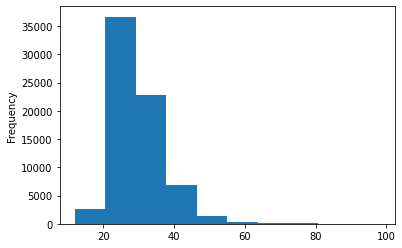

In [9]:
data.BMI.plot.hist()


This shows us that we can put BMI into 5 categories


In [10]:
data['BMI'] = pd.cut(data['BMI'], 5, labels=[1, 2, 3, 4, 5])
data

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,1,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,2,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,1,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


Mental Health can be categorized

<AxesSubplot:ylabel='Frequency'>

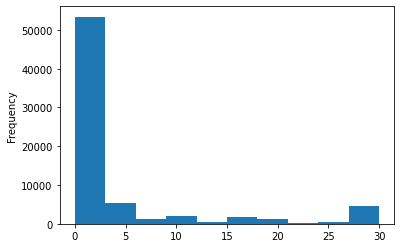

In [11]:
data.Mental_Health.plot.hist()

This shows us Mental Health can be categorized into 3 groups

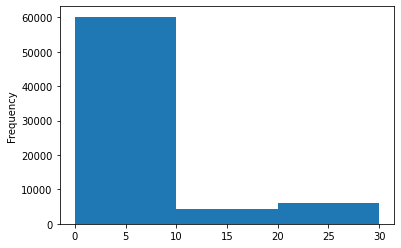

In [12]:
data.Mental_Health.plot.hist(bins=3)
data['Mental_Health'] = pd.cut(data['Mental_Health'], 3, labels=[1, 2, 3])

Physical Health can be categorized

<AxesSubplot:ylabel='Frequency'>

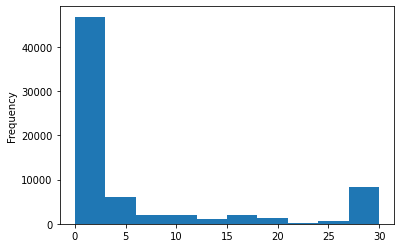

In [13]:
data.Physical_Health.plot.hist()

This shows us Mental Health can be categorized into 3 groups

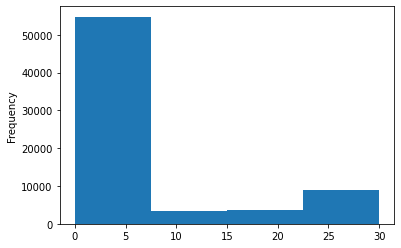

In [14]:
data.Physical_Health.plot.hist(bins=4)
data['Physical_Health'] = pd.cut(data['Physical_Health'], 4, labels=[1, 2, 3, 4])

Age can be categorized

<AxesSubplot:ylabel='Frequency'>

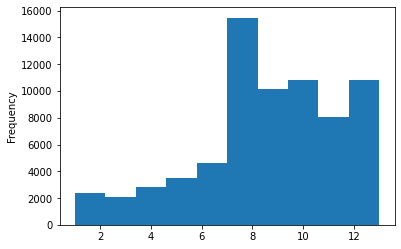

In [15]:
data.Age.plot.hist(bins=10)

This shows us Mental Health can be categorized into 10 groups

In [16]:
data['Age'] = pd.cut(data['Age'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## Encode

In [17]:
encoded = pd.get_dummies(data.General_Health)
data = pd.concat([data, encoded], axis=1)
data = data.drop('General_Health', axis=1)

encoded = pd.get_dummies(data.Sex)
data = pd.concat([data, encoded], axis=1)
data = data.drop('Sex', axis=1)

encoded = pd.get_dummies(data.Education)
data = pd.concat([data, encoded], axis=1)
data = data.drop('Education', axis=1)

encoded = pd.get_dummies(data.Income)
encoded = encoded.rename(columns={"Cat1": "Income_Cat1",
                        "Cat2": "Income_Cat2",
                        "Cat3": "Income_Cat3",
                        "Cat4": "Income_Cat4",
                        "Cat5": "Income_Cat5",
                        "Cat6": "Income_Cat6",
                        "Cat7": "Income_Cat7",
                        "Cat8": "Income_Cat8",
                        "Unknown": "Income_Unknow"})
data = pd.concat([data, encoded], axis=1)
data = data.drop('Income', axis=1)

data

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8,Income_Unknow
0,0.0,1.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,0.0,1.0,1.0,1.0,1,1.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
3,0.0,1.0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,2,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
70688,1.0,0.0,1.0,1.0,1,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
70689,1.0,1.0,1.0,1.0,1,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
70690,1.0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


## Separate Labels

In [18]:
y = np.array(data['Diabetes_binary'])
X = np.array(data.drop(['Diabetes_binary'], 1))
print(X.shape)
print(y.shape)

(70692, 39)
(70692,)


C:\Users\mrahm\AppData\Local\Temp\ipykernel_25124\3596824401.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Diabetes_binary'], 1))


# XGBoost Classifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1, train_size = .8)



In [20]:
classifier = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200,
                           subsample=0.5, colsample_bytree=1, Random_seed=123,
                           eval_metric='auc', verbosity=1)
classifier.fit(X_train, y_train, eval_set=[(X_train , y_train),(X_val,y_val)],early_stopping_rounds=10)

c:\users\mrahm\pycharmprojects\pythonprojectz\venv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.78644	validation_1-auc:0.78096
[1]	validation_0-auc:0.79367	validation_1-auc:0.78965
[2]	validation_0-auc:0.80246	validation_1-auc:0.79852
[3]	validation_0-auc:0.80677	validation_1-auc:0.80320
[4]	validation_0-auc:0.80755	validation_1-auc:0.80364
[5]	validation_0-auc:0.80862	validation_1-auc:0.80419
[6]	validation_0-auc:0.81122	validation_1-auc:0.80767
[7]	validation_0-auc:0.81227	validation_1-auc:0.80869
[8]	validation_0-auc:0.81253	validation_1-auc:0.80902
[9]	validation_0-auc:0.81304	validation_1-auc:0.80920
[10]	validation_0-auc:0.81487	validation

XGBClassifier(Random_seed=123, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

## Prediction

In [21]:
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Accuracy: 0.7506188556474999
Precision: 0.7350874952101162
Recall: 0.7985292077147218
Confusion Matrix


array([[4858, 2074],
       [1452, 5755]], dtype=int64)

# Hyperparameters

In [22]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [23]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

params = [{'learning_rate': [0.02, 0.05, 0.1, 0.3],
         'max_depth': [2, 3, 4],
         'n_estimators': [100, 200, 300],
         'colsample_bytree': [0.8, 1]}]

classifier = XGBClassifier(subsample=0.5, eval_metric='auc')
grid = GridSearchCV(classifier,
                      param_grid=params,
                      scoring=my_roc_auc_score,
                      cv=3)

grid.fit(X_train, y_train)
grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200}

## Train Data

In [25]:
classifier = XGBClassifier(eval_metric='auc', subsample=0.5, learning_rate=0.05, max_depth=4, n_estimators=200,colsample_bytree=1)
classifier.fit(X_train, y_train, eval_set=[(X_train , y_train),(X_val,y_val)],early_stopping_rounds=10)
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)

[0]	validation_0-auc:0.78644	validation_1-auc:0.78096
[1]	validation_0-auc:0.79319	validation_1-auc:0.78930
[2]	validation_0-auc:0.80005	validation_1-auc:0.79511
[3]	validation_0-auc:0.80419	validation_1-auc:0.79999
[4]	validation_0-auc:0.80436	validation_1-auc:0.79960
[5]	validation_0-auc:0.80634	validation_1-auc:0.80179
[6]	validation_0-auc:0.80678	validation_1-auc:0.80247
[7]	validation_0-auc:0.80786	validation_1-auc:0.80311
[8]	validation_0-auc:0.80873	validation_1-auc:0.80359
[9]	validation_0-auc:0.80985	validation_1-auc:0.80463
[10]	validation_0-auc:0.81099	validation_1-auc:0.80603
[11]	validation_0-auc:0.81144	validation_1-auc:0.80631
[12]	validation_0-auc:0.81170	validation_1-auc:0.80689
[13]	validation_0-auc:0.81195	validation_1-auc:0.80722
[14]	validation_0-auc:0.81243	validation_1-auc:0.80761
[15]	validation_0-auc:0.81250	validation_1-auc:0.80763
[16]	validation_0-auc:0.81301	validation_1-auc:0.80809
[17]	validation_0-auc:0.81344	validation_1-auc:0.80862
[18]	validation_0-au

c:\users\mrahm\pycharmprojects\pythonprojectz\venv\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


array([[4868, 2064],
       [1464, 5743]], dtype=int64)

# Visualization

In [26]:
result = pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.516996,0.057982,0.037664,0.001700,0.8,0.02,2,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.811093,0.808079,0.809399,0.809524,0.001234,72
1,2.814343,0.105414,0.030999,0.000004,0.8,0.02,2,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.818847,0.818705,0.817031,0.818195,0.000825,63
2,4.097121,0.101611,0.036175,0.001166,0.8,0.02,2,300,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.822125,0.822362,0.820157,0.821548,0.000989,52
3,1.740799,0.042370,0.031331,0.002627,0.8,0.02,3,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.816762,0.815666,0.815484,0.815971,0.000564,65
4,3.407596,0.117163,0.035667,0.002494,0.8,0.02,3,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.822775,0.823349,0.821036,0.822386,0.000983,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.693765,0.205167,0.035332,0.004025,1,0.3,3,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.819633,0.820130,0.818920,0.819561,0.000497,57
68,5.354337,0.236035,0.038670,0.001244,1,0.3,3,300,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.817719,0.818792,0.817009,0.817840,0.000733,64
69,2.336535,0.075932,0.034334,0.006183,1,0.3,4,100,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.818613,0.820052,0.816047,0.818237,0.001657,62
70,4.607047,0.195987,0.041999,0.012026,1,0.3,4,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.814378,0.815243,0.811621,0.813748,0.001544,68
